In [76]:
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random

In [77]:
# Load MNIST

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [78]:
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, (3,3), input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(36, (3,3)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return model

In [79]:
model = build_cnn_model()
model.predict(train_images[[0]])

array([[0.10517303, 0.09246404, 0.11671782, 0.11566601, 0.09232218,
        0.07497841, 0.08629344, 0.11188659, 0.1076658 , 0.09683266]],
      dtype=float32)

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

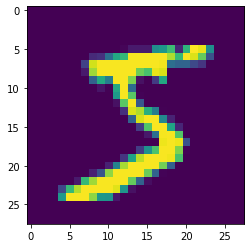

In [81]:
plt.imshow(train_images[0])

In [82]:
model.compile(optimizer='Adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [83]:
BATCH_SIZE = 64
EPOCHS = 5
history = model.fit(train_images, train_labels, validation_split=0.33, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 40199 samples, validate on 19801 samples
Epoch 1/5
40199/40199 [==============================] - 3s 85us/sample - loss: 0.2236 - accuracy: 0.9370 - val_loss: 0.0909 - val_accuracy: 0.9740
Epoch 2/5
40199/40199 [==============================] - 3s 72us/sample - loss: 0.0670 - accuracy: 0.9802 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 3/5
40199/40199 [==============================] - 4s 93us/sample - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0584 - val_accuracy: 0.9829
Epoch 4/5
40199/40199 [==============================] - 3s 72us/sample - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0598 - val_accuracy: 0.9836
Epoch 5/5
40199/40199 [==============================] - 3s 78us/sample - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0521 - val_accuracy: 0.9855


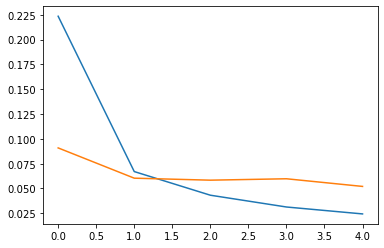

In [84]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [85]:
# testing with some images I generated
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [91]:
path = './test.png'
img = load_img(path, target_size = (28,28), color_mode="grayscale")

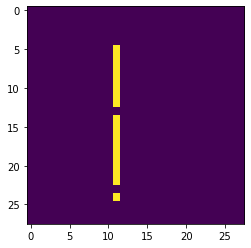

In [92]:
plt.imshow(img)

In [93]:
img = np.reshape(img_to_array(img)/255.0,(1,28,28,1))
#img = 1-img

In [99]:
pred = model.predict(img)

In [100]:
np.squeeze(pred)

array([1.2621675e-01, 5.8262855e-01, 4.8111849e-03, 9.1344564e-06,
       3.2670338e-02, 2.3562292e-02, 1.9403632e-01, 3.0129483e-02,
       4.2434386e-03, 1.6925068e-03], dtype=float32)

In [97]:
model.save('.')

INFO:tensorflow:Assets written to: .\assets


In [98]:
model.save("cnn_model.h5")